In [1]:
import reddutils

from reddutils import exodus
exopop = exodus.Exoplanet_Archive('NasaExoplanetArchive')
exopop.display()

In [2]:
import os
import sqlite3
import pandas as pd
import requests
import numpy as np
import io

# ===============================
# CONFIG
# ===============================
DB_FILE = "exoplanets.db"
TABLE_NAME = "pscomppars"
TAP_URL = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync"
ADQL_QUERY = f"SELECT * FROM {TABLE_NAME}"

# ===============================
# STEP 1. Download data from Exoplanet Archive
# ===============================
def download_table(adql_query: str = ADQL_QUERY, download_full:bool = True) -> pd.DataFrame:
    """Download a table from the NASA Exoplanet Archive TAP service into a DataFrame."""
    print("Downloading table from Exoplanet Archive...")
    response = requests.get(TAP_URL, params={"query": adql_query, "format": "csv"}, timeout=120)
    response.raise_for_status()  # raise error if request failed
    df = pd.read_csv(io.StringIO(response.text))
    if download_full:
        df.to_csv("full_exoplanet_archive.csv", index=False)
        print(f"Downloaded {len(df)} rows and {len(df.columns)} columns.")
    else:
        print(f"Loaded {len(df)} rows and {len(df.columns)} columns.")
    return df

# ===============================
# STEP 2. Save DataFrame to SQLite
# ===============================
def save_to_sqlite(df: pd.DataFrame, db_file: str = DB_FILE, table_name: str = TABLE_NAME):
    """Save DataFrame into an SQLite database."""
    conn = sqlite3.connect(db_file)
    df.to_sql(table_name, conn, if_exists="replace", index=False)
    conn.close()
    print(f"Saved table '{table_name}' to {db_file}")

# ===============================
# STEP 3. Open/close connections
# ===============================
def get_connection(db_file: str = DB_FILE):
    """Get a SQLite connection object."""
    return sqlite3.connect(db_file)

def close_connection(conn, cursor=None):
    """Close cursor and connection safely."""
    if cursor is not None:
        cursor.close()
    conn.close()

# ===============================
# STEP 4. Run SQL queries
# ===============================
def run_query(query: str, db_file: str = DB_FILE):
    """Run an SQL query and return results as a list of tuples."""
    conn = get_connection(db_file)
    cur = conn.cursor()
    cur.execute(query)
    rows = cur.fetchall()
    close_connection(conn, cur)
    return rows

def ensure_database(update: bool = False):
    """
    Ensure database is ready.
    If update=True, always download the latest version and overwrite.
    If update=False, only download if database does not exist.
    """
    if update or not os.path.exists(DB_FILE):
        if update:
            print("Updating local database with latest Exoplanet Archive data...")
        else:
            print("Database not found. Creating it...")
        global exopl_db
        exopl_db = download_table()
        # exopl_db 
        save_to_sqlite(exopl_db)
    else:
        print("Database already exists. Skipping download.")
    print("You can manipulate the pandas DataFrame called 'exopl_db' directly.")
    return exopl_db


# ===============================
# USAGE EXAMPLE
# ===============================
if __name__ == "__main__":
    # Step A: ensure database is ready
    ensure_database(update=True)
    
    # Step B: run a query
    example_query = f"""
    SELECT pl_name, hostname, pl_rade, pl_masse
    FROM {TABLE_NAME}
    WHERE pl_massj < 1
    ORDER BY pl_massj
    LIMIT 10000;
    """
    results = run_query(example_query)
    # for row in results:
    #     print(row)

Updating local database with latest Exoplanet Archive data...
Downloaded 5983 rows and 682 columns.
Saved table 'pscomppars' to exoplanets.db
You can manipulate the pandas DataFrame called 'exopl_db' directly.


In [10]:
results

[('PSR B1257+12 b', 'PSR B1257+12', 0.338, 0.02),
 ('Kepler-80 g', 'Kepler-80', 1.13, 0.065),
 ('Kepler-138 b', 'Kepler-138', 0.64, 0.07),
 ('Kepler-444 e', 'Kepler-444', 0.546, 0.1),
 ('Kepler-444 d', 'Kepler-444', 0.53, 0.2),
 ('TRAPPIST-1 h', 'TRAPPIST-1', 0.755, 0.326),
 ('LHS 1678 b', 'LHS 1678', 0.685, 0.35),
 ('Kepler-42 d', 'Kepler-42', 0.57, 0.357785),
 ('TRAPPIST-1 d', 'TRAPPIST-1', 0.788, 0.388),
 ('Kepler-33 c', 'Kepler-33', 3.2, 0.39),
 ('Kepler-138 e', 'Kepler-138', 0.797, 0.43),
 ('KOI-55 b', 'KOI-55', 0.759, 0.44),
 ('L 98-59 b', 'L 98-59', 0.837, 0.46),
 ('Kepler-345 b', 'Kepler-345', 0.74, 0.48),
 ('Kepler-176 e', 'Kepler-176', 1.45, 0.52075),
 ('HD 23472 d', 'HD 23472', 0.75, 0.55),
 ('Kepler-85 e', 'Kepler-85', 1.27, 0.6),
 ('GJ 367 b', 'GJ 367', 0.699, 0.633),
 ('KOI-55 c', 'KOI-55', 0.867, 0.655),
 ('TRAPPIST-1 e', 'TRAPPIST-1', 0.92, 0.692),
 ('Kepler-54 c', 'Kepler-54', 1.23, 0.7),
 ('Kepler-42 b', 'Kepler-42', 0.78, 0.705944),
 ('HD 23472 e', 'HD 23472', 0.818,

## Check here for details of table collumns names and parameters

[https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html#columns](https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html#columns)

['disc_pubdate', 'disc_year', 'disc_method', 'discoverymethod', 'disc_locale', 'disc_facility', 'disc_instrument', 'disc_telescope', 'disc_refname', 'disc_refid', 'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_distsymerr', 'sy_distlim', 'sy_diststr', 'sy_distformat', 'sy_dist_solnid', 'sy_dist_reflink', 'pl_ndispec']


/tmp/ipykernel_3888315/3141674094.py:51: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,1e6)


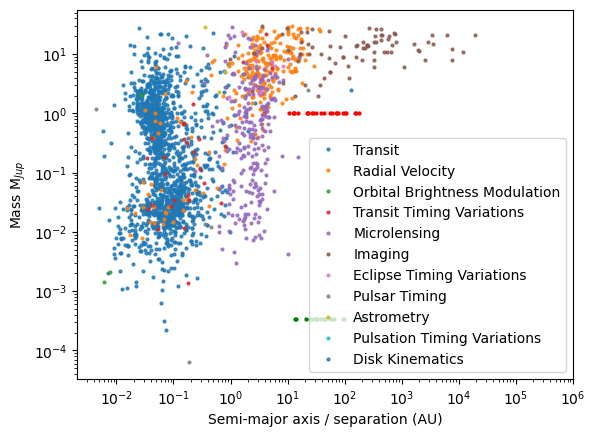

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

exopl_db = pd.read_csv("full_exoplanet_archive.csv",header=0)

feat_table = pd.read_csv("gap_ring_infl_pt.csv",header=0)

print([s for s in exopl_db.columns if "dis" in s])
feat_table = pd.read_csv("gap_ring_infl_pt.csv",header=0)

def custom_log_formatter(x, pos):
    # x is the value on the log scale, convert it back to original scale
    return f'{10**(x):.0f}'
fig, ax = plt.subplots()
# ax.plot(x, y)
# Get unique discovery methods and assign a color to each
discovery_methods = exopl_db["discoverymethod"].astype(str).fillna("Unknown")
unique_methods = discovery_methods.unique()
palette = sns.color_palette("tab10", n_colors=len(unique_methods))
method_color = dict(zip(unique_methods, palette))

# Plot each discovery method with its color and label only once
for method in unique_methods:
    mask = discovery_methods == method
    ax.plot(
        exopl_db.loc[mask, "pl_orbsmax"],
        exopl_db.loc[mask, "pl_massj"],
        "o",
        label=method,
        markersize=2,
        alpha=0.8,
        color=method_color[method]
    )

# Only show one legend entry per method
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

gap_feat = feat_table["R"][feat_table["D/B"].astype(str).str.contains("D")]
inf_feat = feat_table["R"][feat_table["D/B"].astype(str).str.contains("I")]

ax.scatter(gap_feat,[1] * len(gap_feat),marker=".",color="red",linewidth=0.05)
ax.scatter(inf_feat,[0.000338065886] * len(inf_feat),marker=".",color="green",linewidth=0.05)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Semi-major axis / separation (AU)")
ax.set_ylabel(r"Mass M$_{Jup}$")
ax.set_xlim(0,1e6)
ax.legend(by_label.values(), by_label.keys())

# ax.xaxis.set_major_formatter(custom_log_formatter)
# ax.yaxis.set_major_formatter(custom_log_formatter)
#gaps - saurn mass
# cavities jupiter mass
# inflections - earth mass

In [ ]:
# exopl_db["disc_method"]
# exopl_db["discoverymethod"]

0        tran
1        tran
2        tran
3        tran
4        tran
        ...  
5978     tran
5979       rv
5980     tran
5981    micro
5982    micro
Name: disc_method, Length: 5983, dtype: object

In [93]:
np.max(df["semimaj"])
len(exopl_db["pl_orbsmax"]) / len(gaps_inf)
len(df["semimaj"].dropna())
len(df["gaps_inf"].dropna())

46

(array([24., 12.,  5.,  2.,  2.,  1.,  0.,  0.,  0.,  0.]),
 array([  0.,  40.,  80., 120., 160., 200., 240., 280., 320., 360., 400.]),
 <BarContainer object of 10 artists>)

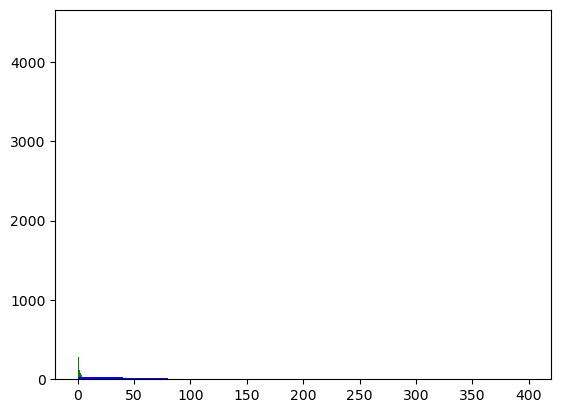

In [116]:
from matplotlib import colors

gaps_inf = pd.concat([gap_feat,inf_feat],ignore_index=False)
df = pd.DataFrame({"semimaj":exopl_db["pl_orbsmax"],"gaps_inf":gaps_inf})
df_cleaned = df.dropna(subset=["semimaj", "gaps_inf"])
plt.hist(df["semimaj"].dropna(),bins=(1000),range=(0,400),color="green")#,norm = colors.LogNorm())
plt.hist(df["gaps_inf"].dropna(),bins=(10),range=(0,400),color="blue")#,norm = colors.LogNorm())


<Axes: xlabel='semimaj', ylabel='gaps_inf'>

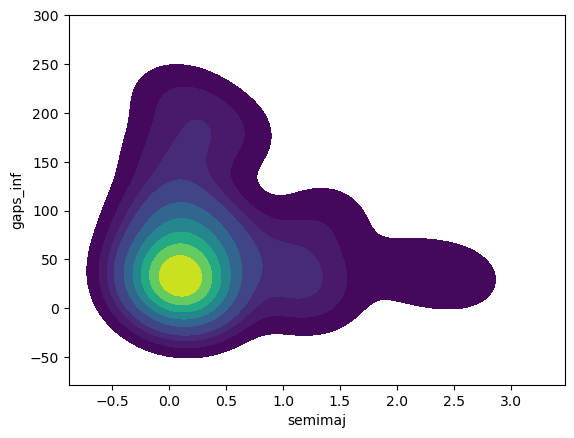

In [117]:
# df = pd.DataFrame({"semimaj":exopl_db["pl_orbsmax"],"gap":gap_feat,"inf":inf_feat})
# gap_feat+inf_feat
gaps_inf = pd.concat([gap_feat,inf_feat],ignore_index=False)
df = pd.DataFrame({"semimaj":exopl_db["pl_orbsmax"],"gaps_inf":gaps_inf})
sns.kdeplot(df, x ="semimaj",y="gaps_inf",fill=True,cmap="viridis")
# sns.kdeplot(df, x ="semimaj",y="inf",fill=False,cmap="viridis")

# sns.kdeplot(df,fill=True,cmap="viridis")

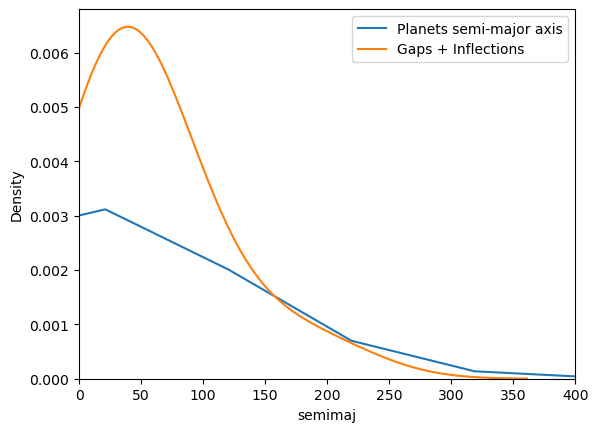

In [71]:
sns.kdeplot(df["semimaj"],bw_adjust=2,label = "Planets semi-major axis")
sns.kdeplot(df["gaps_inf"],bw_adjust=2,label="Gaps + Inflections")
plt.xlim(0,400)
plt.legend()

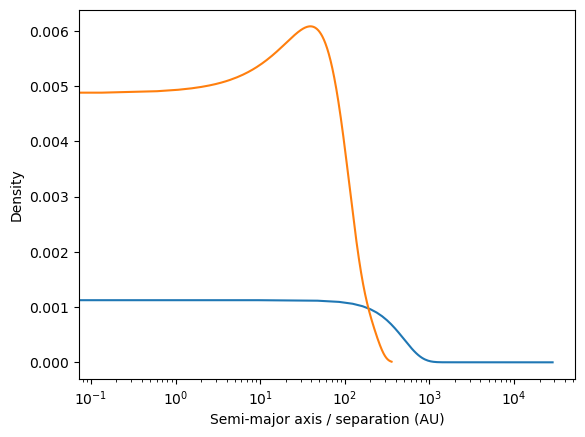

In [96]:
# df.plot.kde()
# 
ax = exopl_db["pl_orbsmax"].plot.kde(bw_method=1)
ax2 = feat_table["R"].plot.kde(bw_method=1)
# ax.xaxis.set_major_formatter(custom_log_formatter)
ax.set_xlabel("Semi-major axis / separation (AU)")
# ax.set_ylim(0, 1)
ax.set_xscale('log')
ax2.set_xscale("log")
ax.set_yscale('linear')
def custom_log_formatter(x, pos):
    # x is the value on the log scale, convert it back to original scale
    return f'{x/np.max(x):.0f}'
# ax.yaxis.set_major_formatter(custom_log_formatter)

<Axes: xlabel='semimaj', ylabel='jup_mass'>

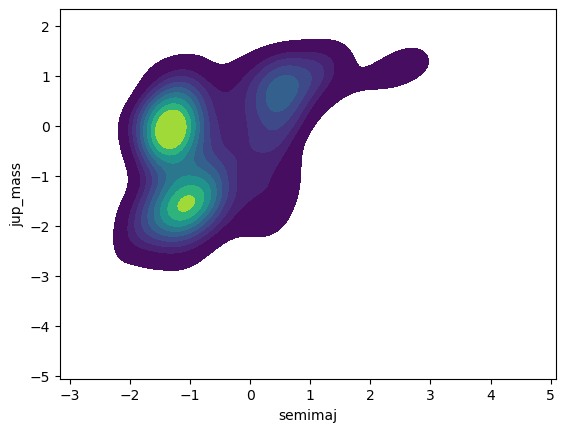

In [78]:
df = pd.DataFrame({"semimaj":np.log10(exopl_db["pl_orbsmax"]),"jup_mass":np.log10(exopl_db["pl_massj"])})
sns.kdeplot(df, x ="semimaj",y="jup_mass",fill=True,cmap="viridis")

ValueError: autodetected range of [nan, nan] is not finite

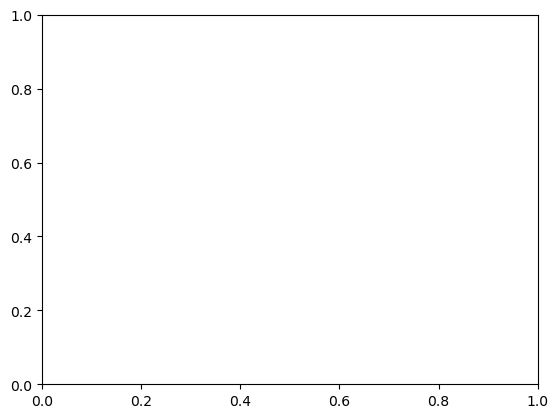

In [97]:
plt.hist2d(exopl_db["pl_orbsmax"],exopl_db["pl_massj"],cmap="viridis")